In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("company.csv")
df.head()

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
dtypes: float64(2), object(3)
memory usage: 5.9+ KB


In [5]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country'], dtype='object')

In [6]:
df.describe()

,Age,Salary
count,130.000000,124.000000
mean,30.484615,5312.467742
std,11.096640,2573.764683
min,0.000000,1089.000000
25%,22.000000,3030.000000
50%,32.500000,5000.000000
75%,37.750000,8000.000000
max,54.000000,9876.000000


In [9]:
df["Company"].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [10]:
df["Company"].nunique()

6

In [11]:
df["Place"].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [12]:
df["Company"].isna().sum()

8

In [13]:
df.apply(lambda x : print(x.value_counts()) )

TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: Company, dtype: int64
22.0    16
33.0    13
44.0    10
21.0     8
23.0     8
34.0     8
32.0     7
35.0     6
0.0      6
41.0     5
43.0     4
24.0     4
45.0     4
25.0     3
36.0     3
40.0     3
31.0     3
20.0     3
30.0     2
26.0     2
37.0     2
46.0     2
50.0     2
18.0     1
17.0     1
38.0     1
19.0     1
51.0     1
54.0     1
Name: Age, dtype: int64
3000.0    9
5000.0    6
4034.0    5
8202.0    5
5034.0    5
3184.0    4
7084.0    4
8787.0    4
1234.0    4
3045.0    4
5835.0    4
9024.0    4
8943.0    4
9284.0    4
2034.0    4
4824.0    4
2934.0    4
1089.0    4
2300.0    4
8345.0    4
7000.0    3
3030.0    3
8000.0    3
9000.0    3
6000.0    3
4000.0    2
9876.0    2
3234.0    2
7654.0    2
5435.0    1
4345.0    1
3033.0    1
5654.0    1
5098.0    1
3454.0    1
6543.0    1
6544.

Company    None
Age        None
Salary     None
Place      None
Country    None
dtype: object

In [15]:
df["Company"].replace({"Tata Consultancy Services":'TCS', "Infosys Pvt Lmt":'Infosys', "Congnizant":'CTS'}, inplace= True)

In [16]:
df["Company"].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

In [17]:
df.duplicated().sum()

8

In [18]:
df[df.duplicated()]

,Company,Age,Salary,Place,Country
84,CTS,43.0,NaN,Mumbai,India
124,Infosys,22.0,8787.0,Calcutta,India
130,TCS,21.0,4824.0,Mumbai,India
131,Infosys,NaN,5835.0,Mumbai,India
144,Infosys,22.0,8787.0,Calcutta,India
145,Infosys,44.0,4034.0,Delhi,India
146,TCS,33.0,5034.0,Mumbai,India
147,Infosys,22.0,8202.0,Cochin,India


In [19]:
df.drop_duplicates(inplace = True)
df.shape

(140, 5)

In [20]:
df.dropna(subset=["Company"], inplace = True)

In [21]:
df["Age"].fillna(df["Age"].median(), inplace = True)

In [23]:
df.head()

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India


In [24]:
df.dropna(subset=["Salary"], inplace = True)

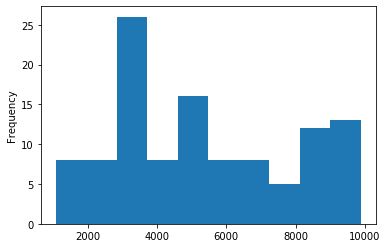

In [25]:
df["Salary"].plot(kind = "hist")

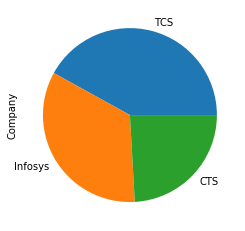

In [26]:
df["Company"].value_counts().plot(kind = "pie")

In [40]:
X = df[["Age"]]
y = df[["Salary"]]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [43]:
train_X

,Age
26,34.0
45,46.0
8,34.0
5,33.0
16,23.0
...,...
111,0.0
134,31.0
85,17.0
30,46.0


In [44]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((78, 1), (34, 1), (78, 1), (34, 1))

In [45]:
import seaborn as sns

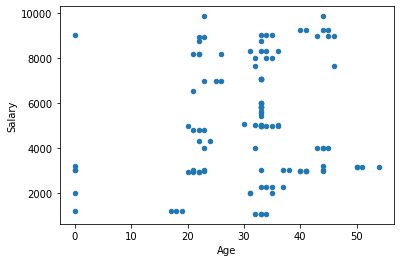

In [46]:
df.plot(kind = "scatter", x = "Age", y = "Salary")

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
model.intercept_

array([3363.1007786])

In [51]:
model.coef_

array([[48.12373445]])

In [52]:
pred_train = model.predict(train_X)

In [53]:
pred_train

array([[4999.30774978],
       [5576.79256314],
       [4999.30774978],
       [4951.18401533],
       [4469.94667087],
       [5095.55521867],
       [4999.30774978],
       [4421.82293642],
       [3363.1007786 ],
       [4421.82293642],
       [3363.1007786 ],
       [5336.1738909 ],
       [5480.54509424],
       [4951.18401533],
       [4951.18401533],
       [5047.43148422],
       [4951.18401533],
       [4951.18401533],
       [4951.18401533],
       [5288.05015646],
       [5336.1738909 ],
       [5480.54509424],
       [4806.81281199],
       [5047.43148422],
       [4951.18401533],
       [4903.06028088],
       [4903.06028088],
       [5191.80268756],
       [4277.45173308],
       [4421.82293642],
       [4854.93654644],
       [4999.30774978],
       [4373.69920197],
       [4421.82293642],
       [4951.18401533],
       [4614.31787421],
       [4469.94667087],
       [4421.82293642],
       [5095.55521867],
       [4903.06028088],
       [4951.18401533],
       [4951.184

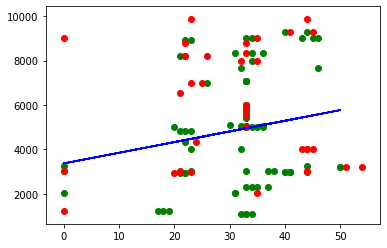

In [54]:
plt.scatter(train_X,train_y, color = "green")
plt.scatter(test_X,test_y, color = "red")
plt.plot(train_X,pred_train, 'b' )

In [55]:
pred_test = model.predict(test_X)

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
mean_squared_error(train_y, pred_train)

5942571.44645486

In [58]:
mean_squared_error(test_y, pred_test)

8370279.589643059

In [59]:
mean_absolute_error(train_y, pred_train)

2036.4271582037006

In [60]:
mean_absolute_error(test_y, pred_test)

2508.374461054632

In [61]:
r2_score(train_y, pred_train)

0.03683083445850577

In [62]:
r2_score(test_y, pred_test)

-0.21410163436640506

In [63]:
data_Org = pd.get_dummies(df["Company"])

In [64]:
data_plc = pd.get_dummies(df["Place"])

In [66]:
data_new = pd.concat([data_Org,data_plc,df[["Age","Salary"]]], axis = 1)

In [67]:
X = data_new.drop(columns="Salary")

In [68]:
y = data_new["Salary"]

In [69]:
data_new.corr()

,CTS,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune,Age,Salary
CTS,1.000000,-0.403876,-0.479253,-0.053495,-0.051473,-0.030065,0.024424,-0.045717,0.051318,-0.001343,-0.053495,0.051318,0.165071,0.168409,-0.016532,-0.135044
Infosys,-0.403876,1.000000,-0.609352,0.132453,-0.021835,0.040151,0.016973,0.016973,0.080758,0.023453,-0.068017,-0.086740,-0.002086,-0.068017,0.106122,-0.029185
TCS,-0.479253,-0.609352,1.000000,-0.080711,0.065562,-0.012463,-0.037453,0.023340,-0.121959,-0.021337,0.111621,0.038740,-0.141072,-0.080711,-0.087485,0.145048
Bhopal,-0.053495,0.132453,-0.080711,1.000000,-0.050880,-0.029719,-0.031324,-0.031324,-0.022582,-0.050880,-0.009009,-0.022582,-0.015747,-0.009009,-0.043319,0.066392
Calcutta,-0.051473,-0.021835,0.065562,-0.050880,1.000000,-0.167846,-0.176907,-0.176907,-0.127536,-0.287356,-0.050880,-0.127536,-0.088932,-0.050880,-0.106430,-0.084000
Chennai,-0.030065,0.040151,-0.012463,-0.029719,-0.167846,1.000000,-0.103332,-0.103332,-0.074494,-0.167846,-0.029719,-0.074494,-0.051945,-0.029719,-0.003604,0.076964
Cochin,0.024424,0.016973,-0.037453,-0.031324,-0.176907,-0.103332,1.000000,-0.108911,-0.078516,-0.176907,-0.031324,-0.078516,-0.054750,-0.031324,0.023713,-0.055508
Delhi,-0.045717,0.016973,0.023340,-0.031324,-0.176907,-0.103332,-0.108911,1.000000,-0.078516,-0.176907,-0.031324,-0.078516,-0.054750,-0.031324,0.129945,-0.046673
Hyderabad,0.051318,0.080758,-0.121959,-0.022582,-0.127536,-0.074494,-0.078516,-0.078516,1.000000,-0.127536,-0.022582,-0.056604,-0.039470,-0.022582,0.186629,-0.075502
Mumbai,-0.001343,0.023453,-0.021337,-0.050880,-0.287356,-0.167846,-0.176907,-0.176907,-0.127536,1.000000,-0.050880,-0.127536,-0.088932,-0.050880,-0.118111,-0.062598


In [71]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 6)

#val_X, test_X, val_y, test_y = train_test_split(test_X, test_y, test_size = 0.5, random_state = 9)

train_X

df.shape

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((78, 15), (34, 15), (78,), (34,))

In [72]:
model = LinearRegression()

model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
model.intercept_

5383.573788292321

In [74]:
model.coef_

array([-2.93054493e+02, -4.17175097e+02,  7.10229590e+02,  7.37809895e+02,
       -1.41854356e+03, -1.52087000e+03, -2.09658582e+03, -2.42824394e+03,
       -2.70082822e+03, -1.21727562e+03,  3.41060513e-13, -1.48487960e+03,
       -1.37953069e+03,  1.76644106e+03,  4.98381313e+01])

In [75]:
pred_train = model.predict(train_X)
pred_test = model.predict(test_X)

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Train - MSE",mean_squared_error(train_y, pred_train))

print("Test - MSE",mean_squared_error(test_y, pred_test))

print("Train - MAE",mean_absolute_error(train_y, pred_train))

print("Test - MAE",mean_absolute_error(test_y, pred_test))

print("Train - R2 Score",r2_score(train_y, pred_train))

print("Test - R2 Score",r2_score(test_y, pred_test))

Train - MSE 5707732.494199989
Test - MSE 6671265.806032529
Train - MAE 2003.9340221307473
Test - MAE 2286.4380003638444
Train - R2 Score 0.1465899205586455
Test - R2 Score -0.14293986725622498
